In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import optimize

def dinamica(nint, t0,tinf,beta,pop,theta=1):
    T = np.zeros((nint+1,))
    T[0] = t0
    for i in range(nint):
        if i<tinf:
            I = T[i]
            if I<0:
                return 1e+10
        else:
            I = T[i]-T[i-tinf]
            if I<0:
                return 1e+10
        T[i+1] = T[i]+beta*(pop-T[i])*I
    return T

def dinamica2(nint, t0,tinf,beta,pop):
    T = np.zeros((nint+1,))
    T[0] = t0
    for i in range(nint):
        if i<tinf:
            I = T[i]
            if I<0:
                return 1e+10
        else:
            I = T[i]-T[i-tinf]
            if I<0:
                return 1e+10
        T[i+1] = T[i]+beta[0]*(pop-T[i])*(I**beta[1]) 
    return T

def dinamica_completa(nint, t0,tinf,beta,pop,theta=1):
    T = np.array(t0+[0.0]*nint)
    if len(t0)<tinf:
        return "erro no tamanho de t0"
    
    for i in range(tinf-1,nint+tinf-1):
        I = T[i]-T[i-tinf]
        if I<0:
            return 1e+10
        T[i+1] = T[i]+beta*(pop-T[i])*I
    return T[tinf:]

def objetivo(x,dados,nint,t0,tinf,pop):
    T = dinamica(nint,t0,tinf,x,pop)
    res = (1/nint)*np.sum((T-dados)**2)
    return res

def objetivo2(x,dados,nint,t0,tinf,pop):
    T = dinamica2(nint,t0,tinf,x,pop)
    res = (1/nint)*np.sum((T-dados)**2)
    return res

<AxesSubplot: >

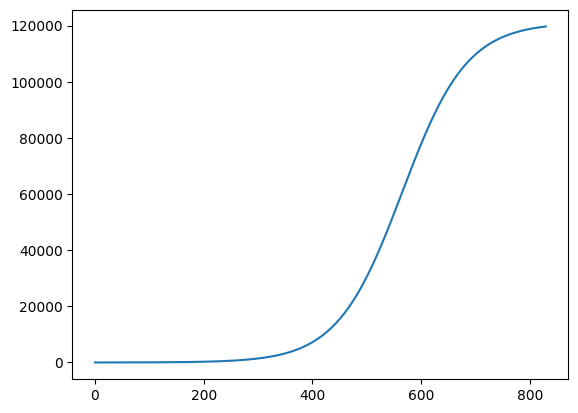

In [498]:
T = dinamica_completa(830,[0,0,0,0,0,0,0,0,0,0,0,1],12,1.5e-7,618124)
sns.lineplot(T)

In [359]:
P, tinf, theta = 618124,12,1
headers = ['dia', 'casos']
dados=pd.read_csv("dados_cuiaba.csv",skiprows = 1, names=headers, parse_dates=['dia'])
dados["d-1"] = dados.casos.shift(1).fillna(0)
dados["casos_novos"] = dados.casos-dados["d-1"]
dados["casos_novos"] = np.where(dados["casos_novos"]<0,np.nan,dados["casos_novos"])
dados["infc"] = dados.casos-dados.casos.shift(tinf).fillna(0)
dados["susc"] = P-dados["infc"]
dados["encontros"] = dados["infc"]*dados["susc"]
dados["alpha"] = (tinf*P)*dados["casos_novos"]/dados["encontros"].shift(1)
dados

,dia,casos,d-1,casos_novos,infc,susc,encontros,alpha
0,2020-03-27,0,0.0,0.0,0.0,618124.0,0.0,NaN
1,2020-03-28,10,0.0,10.0,10.0,618114.0,6181140.0,inf
2,2020-03-29,10,10.0,0.0,10.0,618114.0,6181140.0,0.000000
3,2020-03-30,12,10.0,2.0,12.0,618112.0,7417344.0,2.400039
4,2020-03-31,18,12.0,6.0,18.0,618106.0,11125908.0,6.000116
...,...,...,...,...,...,...,...,...
1060,2023-02-20,152814,152814.0,0.0,169.0,617955.0,104434395.0,0.000000
1061,2023-02-21,152814,152814.0,0.0,166.0,617958.0,102581028.0,0.000000
1062,2023-02-22,152814,152814.0,0.0,163.0,617961.0,100727643.0,0.000000
1063,2023-02-23,153184,152814.0,370.0,533.0,617591.0,329176003.0,27.246449


[Text(0.5, 0, 'dias a partir de '), Text(0, 0.5, 'Infectados')]

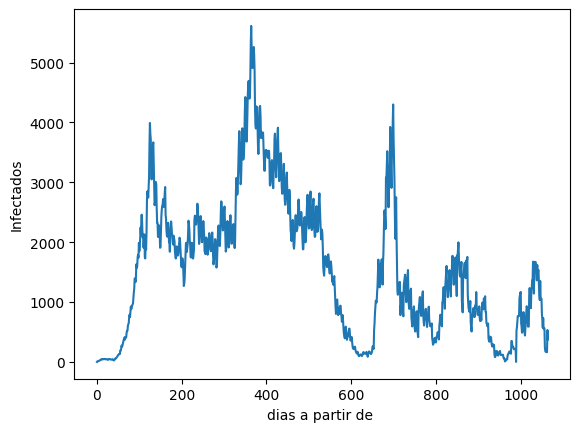

In [412]:
ax = sns.lineplot(x=range(len(dados["dia"])),y=dados["infc"],data=dados)
ax.set(xlabel="dias a partir de ",ylabel="Infectados")

<AxesSubplot: >

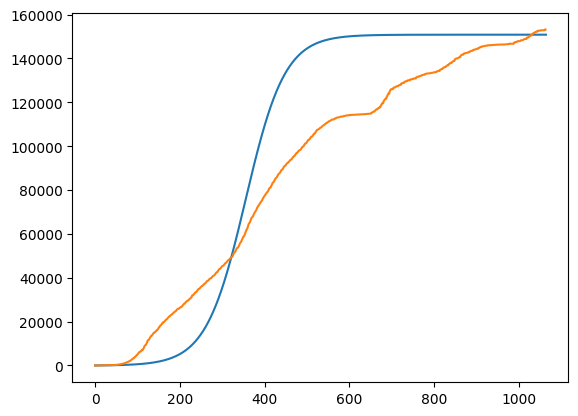

In [372]:
P, tinf = 618124,12
headers = ['dia', 'casos']
dados=pd.read_csv("dados_cuiaba.csv",skiprows = 1, names=headers, parse_dates=['dia'])
dados["d-1"] = dados.casos.shift(1).fillna(0)
dados["casos_novos"] = dados.casos-dados["d-1"]
dados["casos_novos"] = np.where(dados["casos_novos"]<0,np.nan,dados["casos_novos"])
dados["infc"] = dados.casos-dados.casos.shift(tinf).fillna(0)
dados["susc"] = P-dados["infc"]
dados["encontros"] = dados["infc"]*dados["susc"]
dados["alpha"] = (tinf*P)*dados["casos_novos"]/dados["encontros"].shift(1)

d = np.array(dados["casos"])[1:]

dados.describe()

beta = dados["alpha"][tinf:].quantile(.61)/(tinf*P)
T = dinamica(len(d),d[0]*1,tinf=tinf,pop=P,beta=beta)
sns.lineplot(T)
sns.lineplot(d)

[[9.227326376392186, 10], [12.469500989053369, 11], [30.13746486133975, 12], [17.997107778332552, 13], [3.485995389349654, 14], [3.6278786599318966, 15], [4.828960486838703, 16], [6.138239070509441, 17]]


<AxesSubplot: >

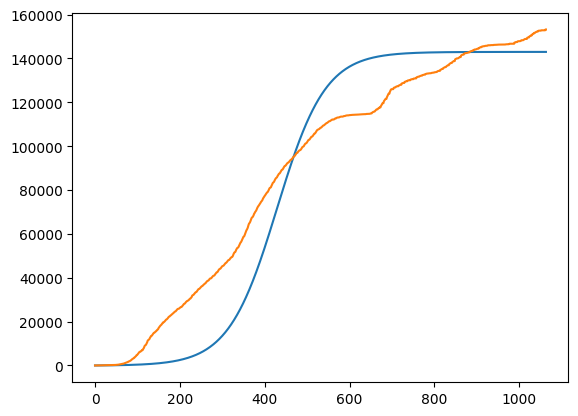

In [546]:
P = 618124
headers = ['dia', 'casos']
dados=pd.read_csv("dados_cuiaba.csv",skiprows = 1, names=headers, parse_dates=['dia'])
TINF = [10,11,12,13,14,15,16,17]
erro = []
for t in TINF:
    tinf = t
    dados["d-1"] = dados.casos.shift(1).fillna(0)
    dados["casos_novos"] = dados.casos-dados["d-1"]
    dados["casos_novos"] = np.where(dados["casos_novos"]<0,np.nan,dados["casos_novos"])
    dados["infc"] = dados.casos-dados.casos.shift(tinf).fillna(0)
    dados["susc"] = P-dados["infc"]
    dados["encontros"] = dados["infc"]*dados["susc"]
    dados["alpha"] = (tinf*P)*dados["casos_novos"]/dados["encontros"].shift(1)
    d = np.array(dados["casos"])[1:]
    beta = dados["alpha"][tinf:][dados["alpha"]<np.inf].mean()/(tinf*P)
    T = dinamica(len(d)-1,d[0]*1,tinf=tinf,pop=P,beta=beta)
    erro.append([1e-8*sum([(1/len(d))*(d[i]-T[i])**2 for i in range(len(T))]),t])

tinf = erro[np.argmin([vl[0] for vl in erro])][1]
beta = dados["alpha"][tinf:][dados["alpha"]<np.inf].mean()/(tinf*P)
print(erro)
T = dinamica(len(d)-1,d[0]*1,tinf=tinf,pop=P,beta=beta)
sns.lineplot(T)
sns.lineplot(d)
# erro


In [507]:
dados["alpha"][tinf:][dados["alpha"]<np.inf]

5       0.277786
6       0.789498
7       1.250024
8       3.333414
9       0.652198
          ...   
1057    0.000000
1058    0.000000
1059    0.000000
1060    0.000000
1064    0.000000
Name: alpha, Length: 1045, dtype: float64

[(0.0, 5.0)]

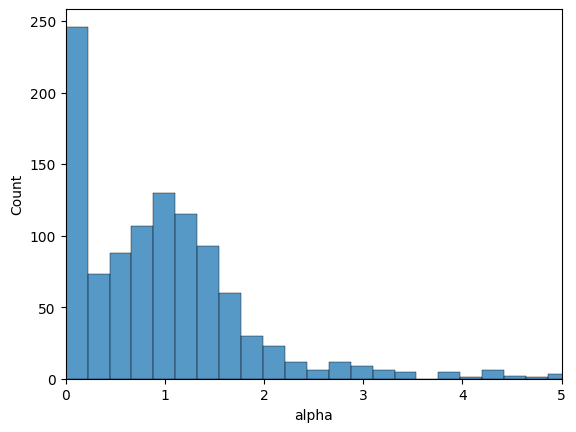

In [411]:
dados["alpha"][tinf:].describe()
ax = sns.histplot(data=dados["alpha"])
ax.set(xlim=[0,5],)

[0.09387769] 0.0005600414643779517


<AxesSubplot: >

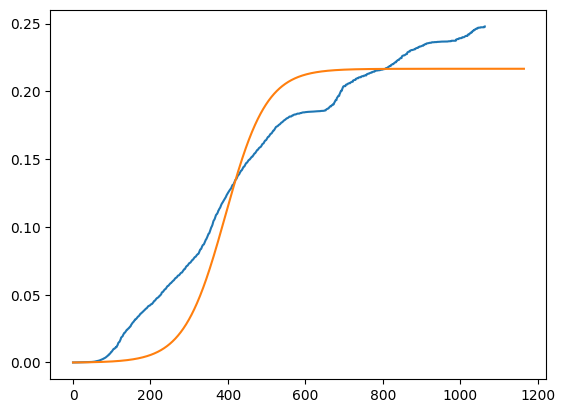

In [418]:
P, tinf = 618124,11
headers = ['dia', 'casos']
dados=pd.read_csv("dados_cuiaba.csv",skiprows = 1, names=headers, parse_dates=['dia'])
dados["d-1"] = dados.casos.shift(1).fillna(0)
dados["casos_novos"] = dados.casos-dados["d-1"]
dados["casos_novos"] = np.where(dados["casos_novos"]<0,np.nan,dados["casos_novos"])
dados["infc"] = dados.casos-dados.casos.shift(tinf).fillna(0)
dados["susc"] = P-dados["infc"]
dados["encontros"] = dados["infc"]*dados["susc"]
dados["alpha"] = (tinf*P)*dados["casos_novos"]/dados["encontros"].shift(1)
d = np.array(dados["casos"])[1:]/P
mn = optimize.minimize(lambda x:objetivo(x,d,len(d)-1,d[0],tinf=tinf,pop=1),x0=1e-3,tol=1e-10)
dp = dinamica(len(d)+100, d[0],tinf,mn.x[0],pop=1)
print(mn.x,mn.fun)
sns.lineplot(d)
sns.lineplot(dp)

In [545]:
# sns.lineplot(dados["alpha"].rolling(3).mean())# dados.tail()

ValueError: need at least one array to concatenate

[0.02807638 0.87746773] 2.9710876962817657e-05


<AxesSubplot: >

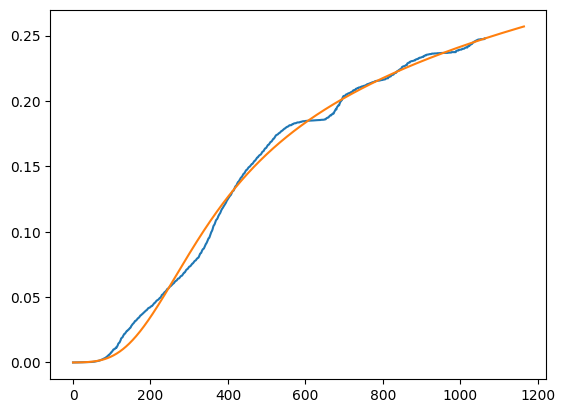

In [555]:
P, tinf = 618124,22
headers = ['dia', 'casos']
dados=pd.read_csv("dados_cuiaba.csv",skiprows = 1, names=headers, parse_dates=['dia'])
dados["d-1"] = dados.casos.shift(1).fillna(0)
dados["casos_novos"] = dados.casos-dados["d-1"]
dados["casos_novos"] = np.where(dados["casos_novos"]<0,np.nan,dados["casos_novos"])
dados["infc"] = dados.casos-dados.casos.shift(tinf).fillna(0)
dados["susc"] = P-dados["infc"]
dados["encontros"] = dados["infc"]*dados["susc"]
dados["alpha"] = (tinf*P)*dados["casos_novos"]/dados["encontros"].shift(1)
d = np.array(dados["casos"])[1:]/P
mn = optimize.minimize(lambda x:objetivo2(x,d,len(d)-1,d[0],tinf=tinf,pop=1),x0=[1e-3,.3],tol=1e-10)
dp = dinamica2(len(d)+100, d[0],tinf,mn.x,pop=1)
print(mn.x,mn.fun)
sns.lineplot(d)
sns.lineplot(dp)

In [249]:
tinf*P

7417488